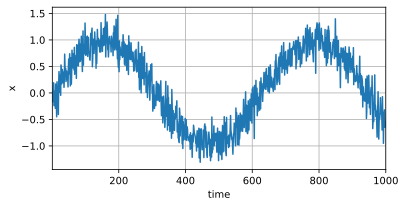

In [5]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l


T = 1000  # Generate a total of 1000 points
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [35]:
tau = 40
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i:T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
# Only the first `n_train` examples are used for training
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [36]:
features

tensor([[ 0.0151, -0.0068, -0.1665,  ...,  0.7309,  0.4885,  0.4015],
        [-0.0068, -0.1665,  0.0341,  ...,  0.4885,  0.4015,  0.4641],
        [-0.1665,  0.0341,  0.1905,  ...,  0.4015,  0.4641,  0.2147],
        ...,
        [-0.0413,  0.3212, -0.1935,  ..., -0.5869, -0.3212, -0.6501],
        [ 0.3212, -0.1935, -0.6728,  ..., -0.3212, -0.6501, -0.5380],
        [-0.1935, -0.6728, -0.5253,  ..., -0.6501, -0.5380, -0.6406]])

In [37]:
print(labels)

.1131e-01],
        [ 4.6615e-01],
        [ 9.8253e-01],
        [ 5.5750e-01],
        [ 9.1446e-01],
        [ 1.1977e+00],
        [ 9.7696e-01],
        [ 9.2991e-01],
        [ 1.0285e+00],
        [ 8.8011e-01],
        [ 9.9003e-01],
        [ 8.8184e-01],
        [ 7.7295e-01],
        [ 8.2540e-01],
        [ 1.0151e+00],
        [ 7.7256e-01],
        [ 1.3249e+00],
        [ 9.4856e-01],
        [ 9.6450e-01],
        [ 1.0809e+00],
        [ 7.8442e-01],
        [ 9.9831e-01],
        [ 8.8852e-01],
        [ 1.2148e+00],
        [ 8.9537e-01],
        [ 9.7997e-01],
        [ 1.1524e+00],
        [ 1.2428e+00],
        [ 9.0712e-01],
        [ 1.4786e+00],
        [ 6.7925e-01],
        [ 9.9410e-01],
        [ 9.4468e-01],
        [ 1.0895e+00],
        [ 1.3372e+00],
        [ 1.1816e+00],
        [ 8.1641e-01],
        [ 9.1638e-01],
        [ 6.7933e-01],
        [ 8.1325e-01],
        [ 1.0200e+00],
        [ 1.0641e+00],
        [ 9.7688e-01],
        [ 9.2837e-01],

In [40]:
# Function for initializing the weights of the network
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

# A simple MLP
def get_net():
    net = nn.Sequential(nn.Linear(40, 10), nn.ReLU(), nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# Square loss
loss = nn.MSELoss()

In [41]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):

        for X, y in train_iter:
            trainer.zero_grad()
            X = X.to(device)
            y = y.to(device)
            l = loss(net(X), y)
            l.backward()
            trainer.step()

net = get_net()
net = net.to(device)
train(net, train_iter, loss, 5, 0.01)

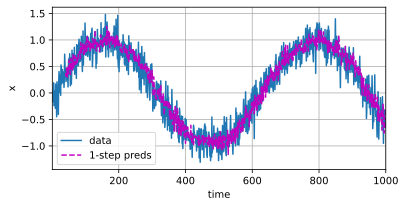

In [42]:
features = features.to(device)
onestep_preds = net(features)
d2l.plot(
    [time, time[tau:]],
    [x.detach().numpy(), onestep_preds.cpu().detach().numpy()], 'time', 'x',
    legend=['data', '1-step preds'], xlim=[1, 1000], figsize=(6, 3))